In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

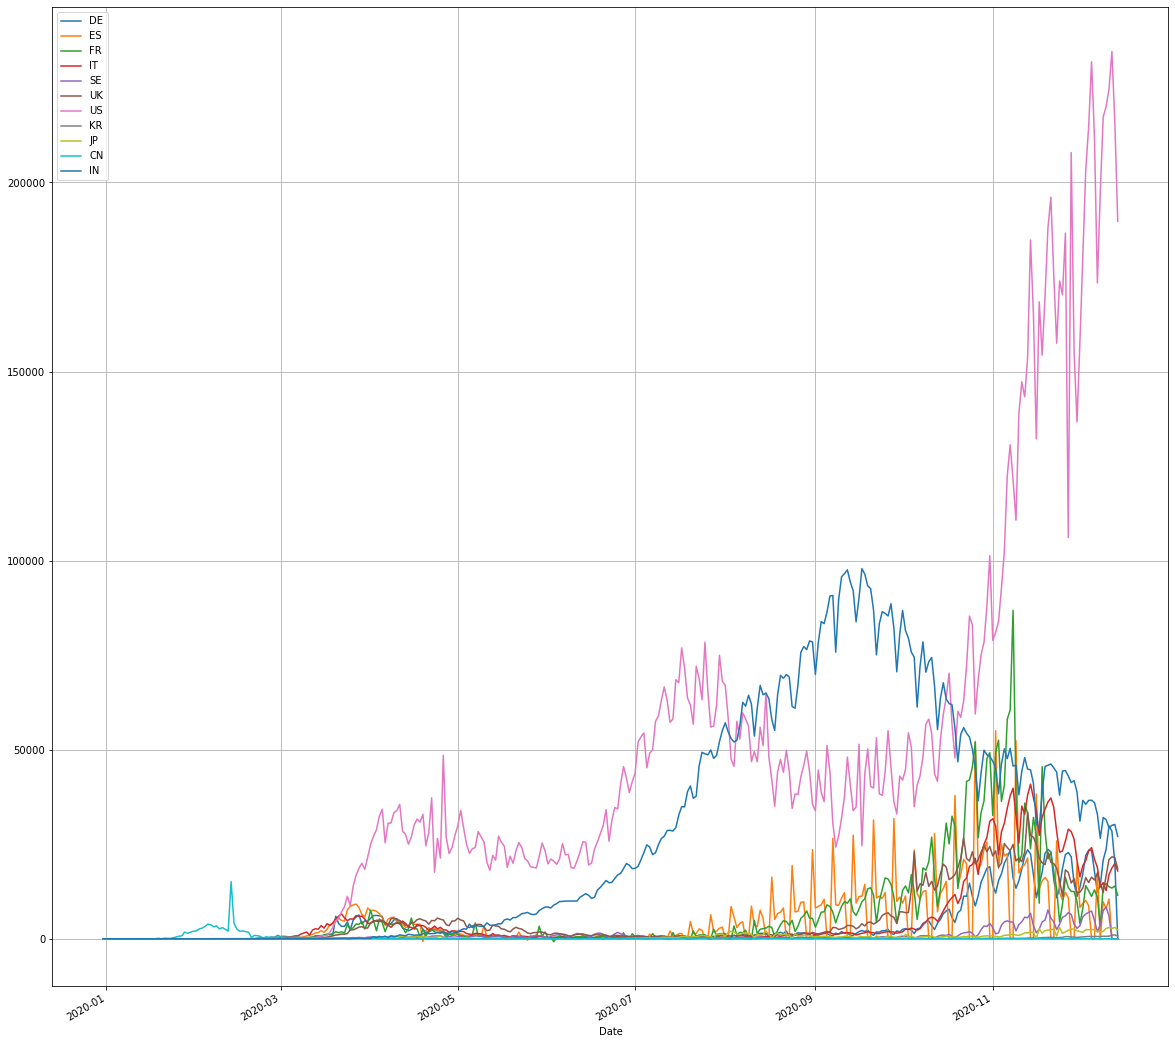

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

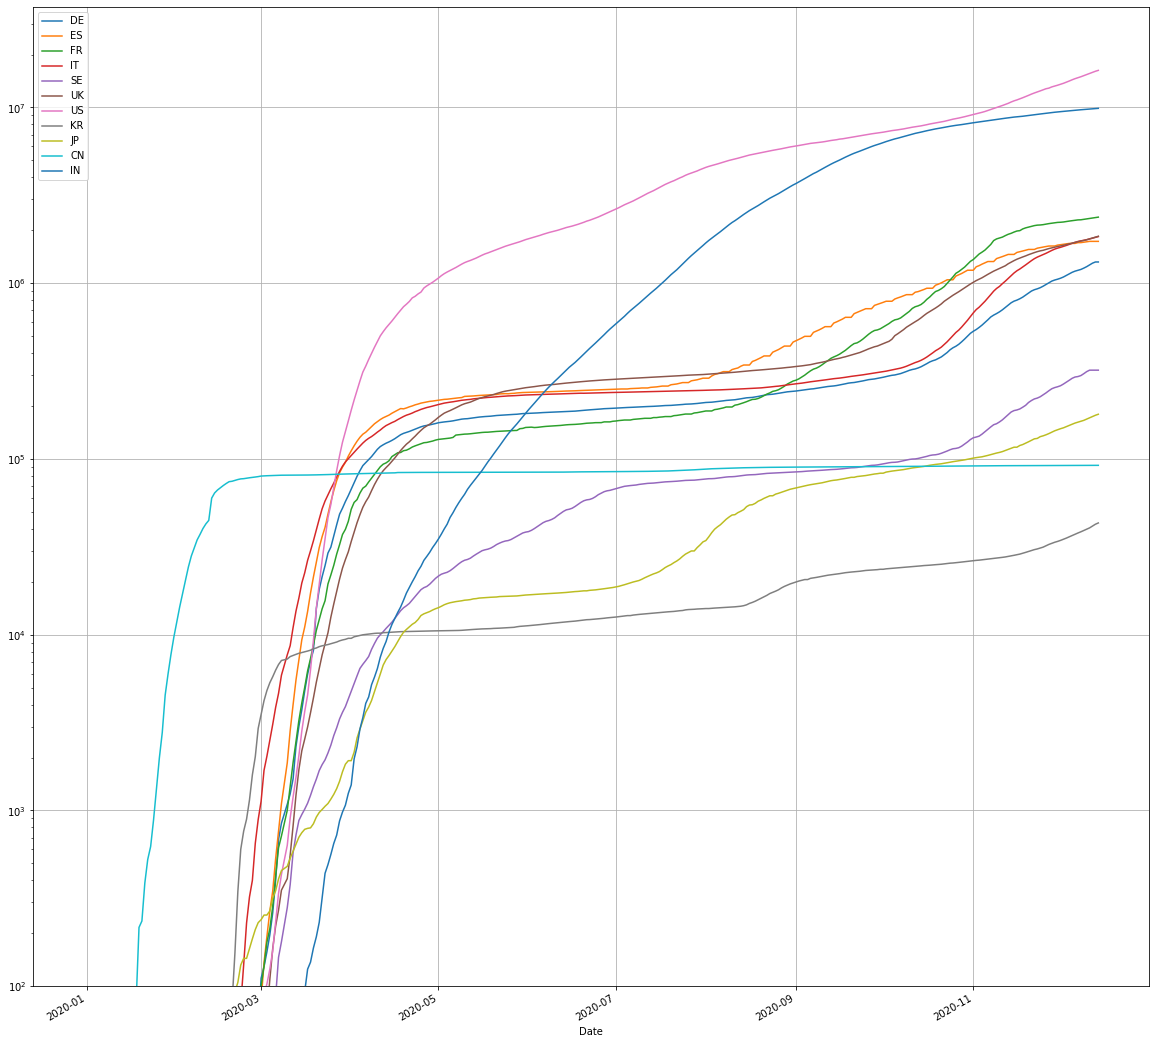

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

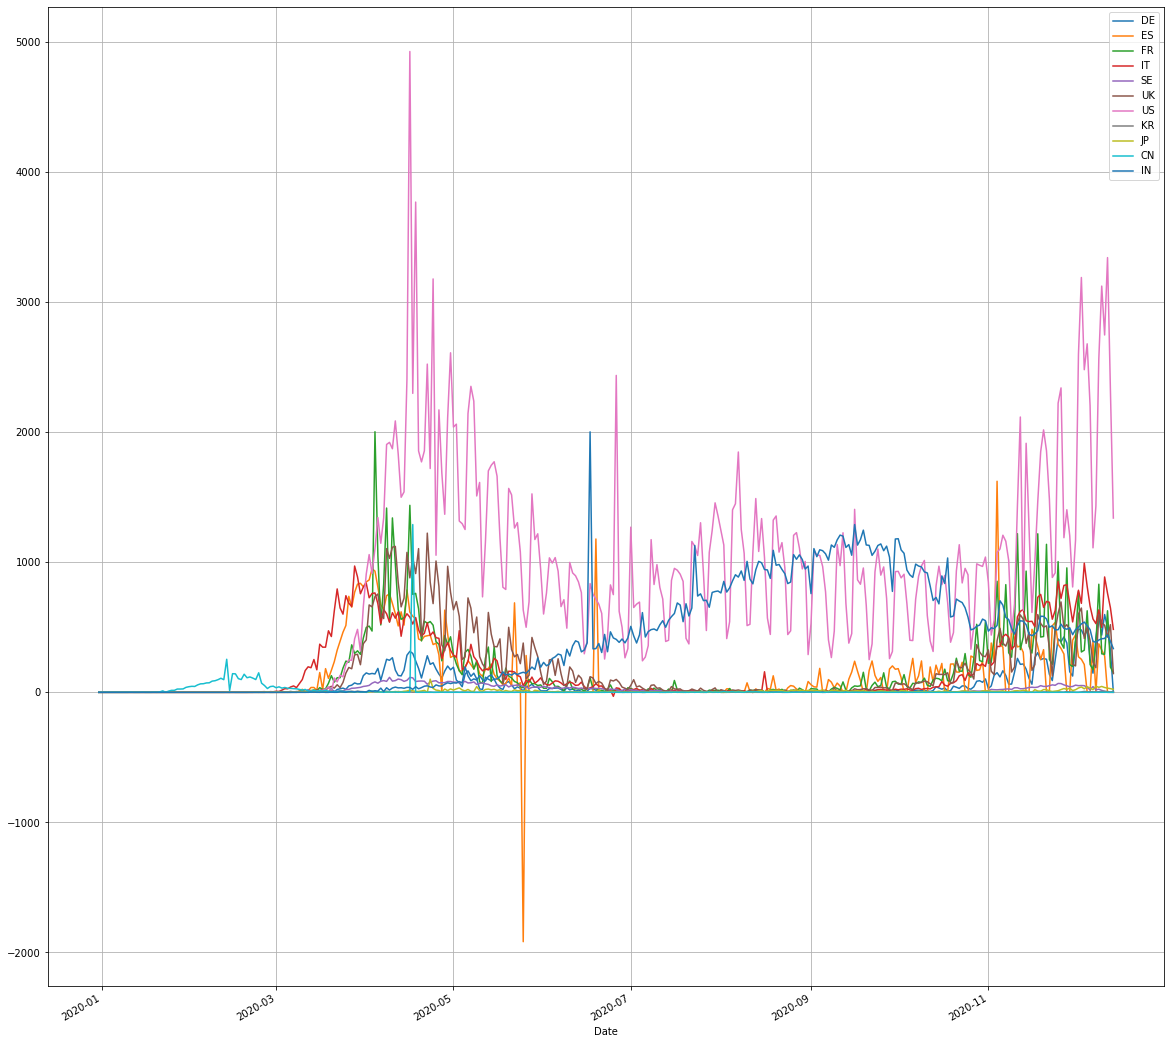

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

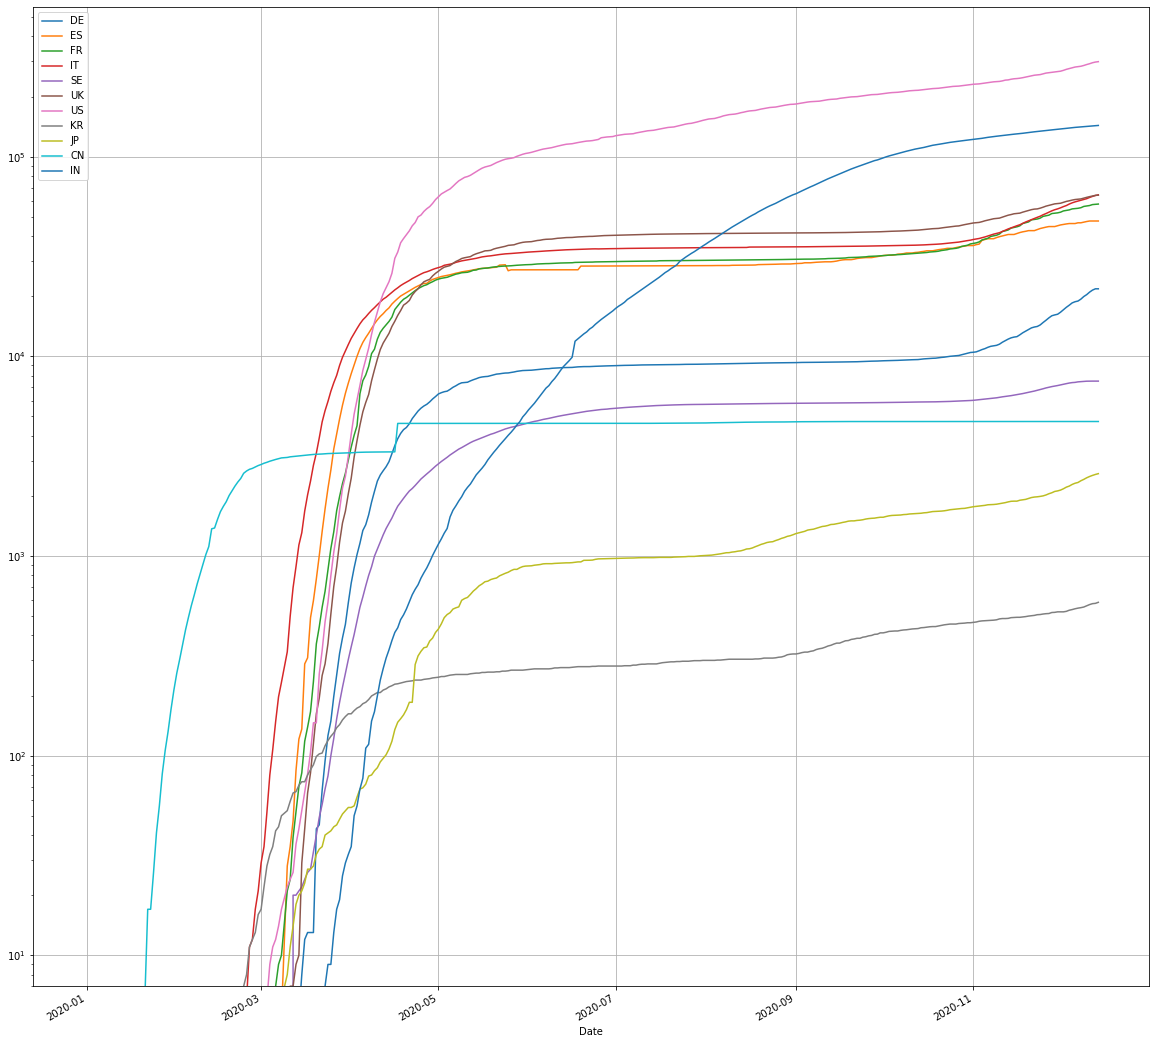

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-11-30,11169.0,19979.0,9784,20646,2754,12155,136670,377,2107,18,38772
12,2020-12-01,13604.0,8257.0,4005,16376,3488,12330,157903,451,1934,12,31118
11,2020-12-02,17270.0,9331.0,8083,19347,5819,13429,180421,511,1692,9,36604
10,2020-12-03,22046.0,10127.0,14064,20709,6548,16170,203311,540,2441,16,35551
9,2020-12-04,23448.0,8745.0,12696,23219,6990,14878,214747,629,2405,17,36595
8,2020-12-05,23318.0,0.0,11221,24110,7343,16298,231930,583,2442,17,36652
7,2020-12-06,17767.0,0.0,12923,21052,4865,15539,211933,631,2424,18,36011
6,2020-12-07,12332.0,17681.0,11022,18887,1803,17271,173432,615,1969,15,32981
5,2020-12-08,14055.0,0.0,3411,13679,3778,14718,197334,594,1862,12,26567
4,2020-12-09,20815.0,9773.0,13713,14837,7449,12281,217344,677,1911,15,32080


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-11-30,1053814.0,1647754.0,2218073.0,1583686.0,257516.0,1617267.0,13383200.0,33953.0,146727.0,91769.0,9431691.0
2020-12-01,1067418.0,1656011.0,2222078.0,1600062.0,261004.0,1629597.0,13541103.0,34404.0,148661.0,91781.0,9462809.0
2020-12-02,1084688.0,1665342.0,2230161.0,1619409.0,266823.0,1643026.0,13721524.0,34915.0,150353.0,91790.0,9499413.0
2020-12-03,1106734.0,1675469.0,2244225.0,1640118.0,273371.0,1659196.0,13924835.0,35455.0,152794.0,91806.0,9534964.0
2020-12-04,1130182.0,1684214.0,2256921.0,1663337.0,280361.0,1674074.0,14139582.0,36084.0,155199.0,91823.0,9571559.0
2020-12-05,1153500.0,1684214.0,2268142.0,1687447.0,287704.0,1690372.0,14371512.0,36667.0,157641.0,91840.0,9608211.0
2020-12-06,1171267.0,1684214.0,2281065.0,1708499.0,292569.0,1705911.0,14583445.0,37298.0,160065.0,91858.0,9644222.0
2020-12-07,1183599.0,1701895.0,2292087.0,1727386.0,294372.0,1723182.0,14756877.0,37913.0,162034.0,91873.0,9677203.0
2020-12-08,1197654.0,1701895.0,2295498.0,1741065.0,298150.0,1737900.0,14954211.0,38507.0,163896.0,91885.0,9703770.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-11-30,125.0,401.0,198,541,45,215,810,3,13,0,443
12,2020-12-01,388.0,442.0,406,672,55,203,1172,0,20,0,482
11,2020-12-02,487.0,273.0,775,785,51,603,2600,0,33,0,501
10,2020-12-03,479.0,254.0,310,684,52,648,3190,3,41,0,526
9,2020-12-04,432.0,214.0,324,993,51,414,2481,7,27,0,540
8,2020-12-05,483.0,0.0,627,814,37,504,2680,4,43,0,512
7,2020-12-06,255.0,0.0,214,662,19,397,2203,5,32,0,482
6,2020-12-07,147.0,394.0,174,564,44,231,1111,4,20,0,391
5,2020-12-08,423.0,0.0,366,528,19,189,1433,3,47,0,385
4,2020-12-09,590.0,373.0,831,634,24,599,2564,4,38,0,402


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-11-30,16248.0,45069.0,52316.0,54771.0,7140.0,58245.0,266869.0,525.0,2118.0,4716.0,137139.0
2020-12-01,16636.0,45511.0,52722.0,55443.0,7195.0,58448.0,268041.0,525.0,2138.0,4716.0,137621.0
2020-12-02,17123.0,45784.0,53497.0,56228.0,7246.0,59051.0,270641.0,525.0,2171.0,4716.0,138122.0
2020-12-03,17602.0,46038.0,53807.0,56912.0,7298.0,59699.0,273831.0,528.0,2212.0,4716.0,138648.0
2020-12-04,18034.0,46252.0,54131.0,57905.0,7349.0,60113.0,276312.0,535.0,2239.0,4716.0,139188.0
2020-12-05,18517.0,46252.0,54758.0,58719.0,7386.0,60617.0,278992.0,539.0,2282.0,4716.0,139700.0
2020-12-06,18772.0,46252.0,54972.0,59381.0,7405.0,61014.0,281195.0,544.0,2314.0,4716.0,140182.0
2020-12-07,18919.0,46646.0,55146.0,59945.0,7449.0,61245.0,282306.0,548.0,2334.0,4716.0,140573.0
2020-12-08,19342.0,46646.0,55512.0,60473.0,7468.0,61434.0,283739.0,551.0,2381.0,4716.0,140958.0
